<a href="https://colab.research.google.com/github/Zarak00/Projects/blob/main/MD_County_Accident_Data/MD_County_Accident_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q1
From these three csv files, create a single dataframe which will include following columns only <br>
- from the "crashes.csv", accident data (acc_dat), accident time (acc_time), weather description (weather_desc),report no, county (county_desc), latittude, and longitude
- from the "persons.csv", gender, data of birth, and state code
- from the "vehicles.csv", vehicle year, vehicle make, speed limit
<br>

Save your dataframe as a new csv file called "md_crash_2020.csv".

Note: All these csv files have the 'REPORT_NO' column. You need to use that column to combine these datasets.

In [ ]:
import pandas as pd

In [ ]:
crashes = pd.read_csv("crashes.csv", usecols = ['ACC_DATE','ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC','LATITUDE','LONGITUDE'], low_memory = False)[['ACC_DATE','ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC','LATITUDE','LONGITUDE']]
persons = pd.read_csv("persons.csv", usecols = ['SEX_DESC','DATE_OF_BIRTH','LICENSE_STATE_CODE','REPORT_NO'], low_memory = False)[['SEX_DESC','DATE_OF_BIRTH','LICENSE_STATE_CODE','REPORT_NO']]
vehicles = pd.read_csv("vehicles.csv", usecols = ['VEH_YEAR','VEH_MAKE','SPEED_LIMIT','REPORT_NO'], low_memory = False)[['VEH_YEAR','VEH_MAKE','SPEED_LIMIT','REPORT_NO']]

In [ ]:
md_crash_2020 = crashes.merge(persons, on = 'REPORT_NO', how = 'inner')

In [ ]:
md_crash_2020 = md_crash_2020.merge(vehicles, on = 'REPORT_NO', how = 'inner')

In [ ]:
md_crash_2020[md_crash_2020['ACC_DATE'] > 20200000]

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT
0,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,2019.0,TOY,5
1,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,NaN,UNKNOWN,5
2,20220422,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,Female,19830919,MD,2017.0,VOLKSWAGEN,5
3,20220422,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,Female,19830919,MD,2004.0,NISSAN,5
4,20220422,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,NaN,NaN,NaN,2017.0,VOLKSWAGEN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216013,20200322,15:53:00,NaN,AC24100005,Anne Arundel,38.929431,-76.560887,Male,20081113,NaN,2016.0,CHEVY,5
3216022,20200114,12:34:00,Raining,AE5921006N,Baltimore,39.415545,-76.613480,Female,19980525,MD,2011.0,TOYT,35
3216023,20200114,12:34:00,Raining,AE5921006N,Baltimore,39.415545,-76.613480,Female,19980525,MD,2017.0,LINC,35
3216024,20200114,12:34:00,Raining,AE5921006N,Baltimore,39.415545,-76.613480,Female,19590430,MD,2011.0,TOYT,35


In [ ]:
md_crash_2020['ACC_DATE']=pd.to_datetime(md_crash_2020['ACC_DATE'], format = "%Y%m%d")

In [ ]:
md_crash_2020.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT
0,2020-06-18,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,2019.0,TOY,5
1,2020-06-18,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,NaN,UNKNOWN,5
2,2022-04-22,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,Female,19830919,MD,2017.0,VOLKSWAGEN,5
3,2022-04-22,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,Female,19830919,MD,2004.0,NISSAN,5
4,2022-04-22,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,NaN,NaN,NaN,2017.0,VOLKSWAGEN,5


In [ ]:
md_crash_2020['ACC_YEAR']=md_crash_2020['ACC_DATE'].dt.year
md_crash_2020.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR
0,2020-06-18,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,2019.0,TOY,5,2020
1,2020-06-18,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,NaN,UNKNOWN,5,2020
2,2022-04-22,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,Female,19830919,MD,2017.0,VOLKSWAGEN,5,2022
3,2022-04-22,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,Female,19830919,MD,2004.0,NISSAN,5,2022
4,2022-04-22,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,NaN,NaN,NaN,2017.0,VOLKSWAGEN,5,2022


In [ ]:
df1 = md_crash_2020[md_crash_2020['ACC_YEAR'] == 2020]

In [ ]:
df1.shape

(411747, 14)

In [ ]:
df1.to_csv('md_crash_2020.csv')

### Q2
a. For each county, determine the average age of the drivers who were involved in these accidents  <br>
b. Then list the sorted averages (from youngest to oldest) <br>

In [ ]:
df1.isna().sum()

ACC_DATE                   0
ACC_TIME                   0
WEATHER_DESC          312585
REPORT_NO                  0
COUNTY_DESC                2
LATITUDE                   0
LONGITUDE                  0
SEX_DESC               36689
DATE_OF_BIRTH          37395
LICENSE_STATE_CODE    130008
VEH_YEAR               18650
VEH_MAKE                  22
SPEED_LIMIT                0
ACC_YEAR                   0
dtype: int64

In [ ]:
df1 = df1.dropna(subset=['DATE_OF_BIRTH'])

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1.shape

(371807, 14)

In [ ]:
df1.dtypes

ACC_DATE              datetime64[ns]
ACC_TIME                      object
WEATHER_DESC                  object
REPORT_NO                     object
COUNTY_DESC                   object
LATITUDE                     float64
LONGITUDE                    float64
SEX_DESC                      object
DATE_OF_BIRTH                 object
LICENSE_STATE_CODE            object
VEH_YEAR                     float64
VEH_MAKE                      object
SPEED_LIMIT                    int64
ACC_YEAR                       int64
dtype: object

In [ ]:
df1['DATE_OF_BIRTH']=df1['DATE_OF_BIRTH'].astype('str')

In [ ]:
df1['DATE_OF_BIRTH']=df1['DATE_OF_BIRTH'].apply(lambda x:x.rstrip('.0'))

In [ ]:
df1['DATE_OF_BIRTH']=df1['DATE_OF_BIRTH'].astype('int')

In [ ]:
df1['DATE_OF_BIRTH']=pd.to_datetime(df1['DATE_OF_BIRTH'], format = "%Y%m%d")
df1.head(2)

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR
6,2020-10-27,17:50:00,NaN,AE63330016,Baltimore,39.32362,-76.50308,Male,2001-08-25,MD,2006.0,MAZDA,5,2020
7,2020-10-27,17:50:00,NaN,AE63330016,Baltimore,39.32362,-76.50308,Male,2001-08-25,MD,2004.0,1G8AJ52F04Z203045,0,2020


In [ ]:
df1['Age'] = df1['ACC_YEAR'] - df1['DATE_OF_BIRTH'].dt.year
df1.head(2)

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR,Age
6,2020-10-27,17:50:00,NaN,AE63330016,Baltimore,39.32362,-76.50308,Male,2001-08-25,MD,2006.0,MAZDA,5,2020,19
7,2020-10-27,17:50:00,NaN,AE63330016,Baltimore,39.32362,-76.50308,Male,2001-08-25,MD,2004.0,1G8AJ52F04Z203045,0,2020,19


**# 2(a)**

In [ ]:
df_age = df1.groupby('COUNTY_DESC')[['Age']].mean()
df_age

,Age
COUNTY_DESC,
Allegany,39.791229
Anne Arundel,38.060439
Baltimore,38.127426
Baltimore City,36.639284
Calvert,37.879937
Caroline,37.446503
Carroll,39.238400
Cecil,37.598697
Charles,36.655841


**#2(b)**

In [ ]:
df_age.sort_values(by='Age',ascending = True)

,Age
COUNTY_DESC,
Worcester,34.727121
Baltimore City,36.639284
Charles,36.655841
Wicomico,36.923889
St. Mary's,36.925402
Prince George's,36.984265
Garrett,37.271057
Caroline,37.446503
Cecil,37.598697


### Q3
a. Determine the total number of crashes per "vehicle make". List the sorted values (e.g. Honda, 1234)<br>
b. Determine average age of the car involved in these accidents for each "vehicle make".  <br>

In [ ]:
df1 = df1.dropna(subset=['VEH_MAKE'])

In [ ]:
df1.isna().sum()

ACC_DATE                   0
ACC_TIME                   0
WEATHER_DESC          284094
REPORT_NO                  0
COUNTY_DESC                0
LATITUDE                   0
LONGITUDE                  0
SEX_DESC                   0
DATE_OF_BIRTH              0
LICENSE_STATE_CODE     91239
VEH_YEAR                8557
VEH_MAKE                   0
SPEED_LIMIT                0
ACC_YEAR                   0
Age                        0
dtype: int64

In [ ]:
df1 = df1[~df1['VEH_MAKE'].str.isalnum()]

In [ ]:
df1 = df1[~df1['VEH_MAKE'].str.isnumeric()]

In [ ]:
df1.head(5)

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR,Age
305,2020-11-08,08:20:00,NaN,MCP2877008L,Montgomery,38.961622,-77.085481,Male,1972-02-17,MD,2012.0,NEW FLYER,15,2020,48
358,2020-12-29,13:09:00,NaN,DA41990031,Prince George's,38.504200,-76.554500,Female,1974-04-27,MD,2018.0,MERZ BEN,15,2020,46
1613,2020-05-13,19:30:00,NaN,AC2266002G,Anne Arundel,38.905585,-76.527669,Male,1967-11-29,MD,2005.0,FOREST RIVER,0,2020,53
2621,2020-06-13,14:11:00,NaN,AC2408000R,Anne Arundel,38.980470,-76.545118,Male,1953-01-02,MD,2019.0,HARLEY DAVIDSON,15,2020,67
2858,2020-10-10,18:22:00,NaN,CBPD0102001T,Prince George's,38.936427,-76.718931,Male,2003-03-13,MD,2012.0,MERCEDES BENZ,15,2020,17


In [ ]:
df_crashes = df1.groupby('VEH_MAKE')[['REPORT_NO']].count()
df_crashes

,REPORT_NO
VEH_MAKE,
05/2021,2
4 DOOR,4
ACURA STATEFARM,1
ALFA REMERO,2
ALFA ROMEO,20
...,...
WESTERN STAR,88
WORK/UPS,1
YELLOW BUS,2


In [ ]:
df_crashes.sort_values(by='REPORT_NO',ascending = True)

,REPORT_NO
VEH_MAKE,
NEW FLYERBUS,1
LEXS=US,1
LINCOLN / LINCOLN-CO,1
GATOR 50 S3,1
FRIGHT TRUCK,1
...,...
RANGE ROVER,129
LAND ROVER,369
MERCEDES BENZ,390


In [ ]:
df1 = df1.dropna(subset=['VEH_YEAR'])

In [ ]:
df1['VEH_YEAR'] = df1['VEH_YEAR'].astype('int')

In [ ]:
df1['VEH_AGE'] = df1['ACC_YEAR'] - df1['VEH_YEAR']

In [ ]:
df_veh_age = df1.groupby('VEH_MAKE')[['VEH_AGE']].mean()
df_veh_age

,VEH_AGE
VEH_MAKE,
05/2021,8.000000
4 DOOR,7.000000
ACURA STATEFARM,24.000000
ALFA REMERO,3.000000
ALFA ROMEO,2.050000
...,...
WESTERN STAR,3.272727
WORK/UPS,10.000000
YELLOW BUS,6.000000


### Q4
a. Determine all the accidents that happened in a circle centered at (39.016149, -77.117942) with a radius of 5 km. Among them,  <br>
b. Determine the number of accidents where the speed limit was above 51 miles per hour. <br>
c. Determine the number of accidents where the speed limit was below 41 miles per hour.  <br>
<br>
Hint: Please see the "P1_Helper_Distance_From_Coordinates.ipynb" that can be found at https://github.com/simsekergun/DATA601/tree/main/Project1

In [ ]:
from math import radians, sin, cos, acos
import numpy as np

In [ ]:
def haversine_distance(lat2, lon2):
   r = 6371
   lat1=39.016149
   lon1=-77.117942
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2-lat1)
   delta_lambda = np.radians(lon2-lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))
   return np.round(res, 2)

In [ ]:
df1['Distance']=df1.apply(lambda x: haversine_distance(x['LATITUDE'], x['LONGITUDE']), axis=1)
df1.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR,Age,VEH_AGE,Distance
305,2020-11-08,08:20:00,NaN,MCP2877008L,Montgomery,38.961622,-77.085481,Male,1972-02-17,MD,2012,NEW FLYER,15,2020,48,8,6.68
358,2020-12-29,13:09:00,NaN,DA41990031,Prince George's,38.504200,-76.554500,Female,1974-04-27,MD,2018,MERZ BEN,15,2020,46,2,75.02
1613,2020-05-13,19:30:00,NaN,AC2266002G,Anne Arundel,38.905585,-76.527669,Male,1967-11-29,MD,2005,FOREST RIVER,0,2020,53,15,52.50
2621,2020-06-13,14:11:00,NaN,AC2408000R,Anne Arundel,38.980470,-76.545118,Male,1953-01-02,MD,2019,HARLEY DAVIDSON,15,2020,67,1,49.66
2858,2020-10-10,18:22:00,NaN,CBPD0102001T,Prince George's,38.936427,-76.718931,Male,2003-03-13,MD,2012,MERCEDES BENZ,15,2020,17,8,35.61


**#4(a)**

In [ ]:
df2=df1.loc[df1['Distance']<=5]
df2

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR,Age,VEH_AGE,Distance
15331,2020-06-27,12:06:00,NaN,MCP2187000G,Montgomery,39.029947,-77.126953,Male,2003-01-22,NaN,2019,MERCEDES BENZ,45,2020,17,1,1.72
15332,2020-06-27,12:06:00,NaN,MCP2187000G,Montgomery,39.029947,-77.126953,Male,1941-11-28,MD,2019,MERCEDES BENZ,45,2020,79,1,1.72
57424,2020-06-16,16:45:00,NaN,MCP3168001Z,Montgomery,39.053700,-77.099073,Male,1992-01-02,MD,2013,NEW FLYER,35,2020,28,7,4.48
65317,2020-05-13,08:26:00,NaN,MCP24110050,Montgomery,39.054014,-77.106813,Male,1962-10-27,MD,2014,GILL BUS,30,2020,58,6,4.32
65319,2020-05-13,08:26:00,NaN,MCP24110050,Montgomery,39.054014,-77.106813,Male,1959-10-02,MD,2014,GILL BUS,30,2020,61,6,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140391,2020-01-17,21:18:00,NaN,MCP2354001D,Montgomery,39.025018,-77.142790,Female,1952-05-31,MD,2014,GILL BLU,15,2020,68,6,2.36
3150523,2020-03-04,15:10:00,NaN,MCP271700RZ,Montgomery,38.990906,-77.158485,Female,1978-12-19,MD,2013,THOMAS BUILTT,35,2020,42,7,4.49
3150525,2020-03-04,15:10:00,NaN,MCP271700RZ,Montgomery,38.990906,-77.158485,Male,1964-09-13,MD,2013,THOMAS BUILTT,35,2020,56,7,4.49
3151827,2020-02-10,16:00:00,Raining,MCP271700RQ,Montgomery,38.987683,-77.146124,Female,1954-07-27,MD,2014,NEW FLYER,35,2020,66,6,3.99


**#4(b)**

In [ ]:
df3=df2[df2['SPEED_LIMIT']>51]
df3.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR,Age,VEH_AGE,Distance
206295,2020-09-09,14:45:00,NaN,MSP673000CQ,Montgomery,39.052138,-77.152446,Female,1960-09-06,MD,2019,LAND ROVER,55,2020,60,1,4.99
255503,2020-07-21,23:44:00,Raining,MCP32150015,Montgomery,39.011503,-77.091424,Male,1967-11-06,MD,2013,NEW FLYER,55,2020,53,7,2.35
317960,2020-11-21,03:05:00,NaN,MSP693500DB,Montgomery,39.016568,-77.098676,Male,1980-04-01,VA,2020,HARLEY DAVIDSON,55,2020,40,0,1.67
3005860,2020-02-17,15:13:00,NaN,MSP675600MH,Montgomery,39.006268,-77.069774,Male,1985-01-01,MD,2006,MERCEDES BENZ,55,2020,35,14,4.30
3005862,2020-02-17,15:13:00,NaN,MSP675600MH,Montgomery,39.006268,-77.069774,Female,1997-10-11,MD,2006,MERCEDES BENZ,55,2020,23,14,4.30


In [ ]:
df3_data=df3['SPEED_LIMIT'].count()
df3_data

15

**#4(c)**

In [ ]:
df4=df2[df2['SPEED_LIMIT']<41]
df4.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR,Age,VEH_AGE,Distance
57424,2020-06-16,16:45:00,NaN,MCP3168001Z,Montgomery,39.053700,-77.099073,Male,1992-01-02,MD,2013,NEW FLYER,35,2020,28,7,4.48
65317,2020-05-13,08:26:00,NaN,MCP24110050,Montgomery,39.054014,-77.106813,Male,1962-10-27,MD,2014,GILL BUS,30,2020,58,6,4.32
65319,2020-05-13,08:26:00,NaN,MCP24110050,Montgomery,39.054014,-77.106813,Male,1959-10-02,MD,2014,GILL BUS,30,2020,61,6,4.32
66867,2020-05-30,01:00:00,NaN,MCP3069001K,Montgomery,38.985312,-77.086860,Male,2000-04-03,MD,2017,MERS-BENZ,25,2020,20,3,4.36
111293,2020-10-20,09:24:00,NaN,MCP32570010,Montgomery,38.999200,-77.072205,Male,1962-04-11,MD,2009,NEW FLYER,30,2020,58,11,4.38


In [ ]:
df4_data=df4['SPEED_LIMIT'].count()
df4_data

62

### Q5
Download "Licensed Drivers By Sex" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

a. Determine the number of drivers, who got in a car crash, from non-DMV states as a function of gender and list them <br>
`St Male Female` <br>
`NY 1510  622` <br>
`PA 1251 1312` <br>
... <br>
Note: DMV states: DC, MD, and VA  <br>
 <br>
b. Normalize the previous list with number of male drivers and female drivers for each state. e.g. There are 1 million male drivers in NY and 2 million female drivers, then the normalized numbers should be <br>
<br>
`St    Male_Norm  Female_Norm` <br>
`NY    1.510e-3  0.311e-3` <br>



In [ ]:
df5 = pd.read_csv('states_drivers.csv')
df5.head()

,STATE,MALE,FEMALE
0,Alabama,"1,896,942","2,010,096"
1,Alaska,"251,993","281,234"
2,Arizona,"2,502,985","2,475,777"
3,Arkansas,"1,041,548","1,078,030"
4,California,"12,968,614","12,564,306"


In [ ]:
df1.value_counts(['LICENSE_STATE_CODE'])

LICENSE_STATE_CODE
MD                    1991
VA                      88
DC                      81
PA                      57
DE                      33
XX                      23
FL                      20
GA                      16
NY                      14
NJ                      13
NC                       7
TX                       7
OH                       7
WV                       7
CA                       7
MI                       6
SC                       6
MA                       5
LA                       4
AZ                       4
CT                       4
ME                       3
KY                       3
WA                       2
QC                       2
MN                       2
NE                       1
RI                       1
ND                       1
MS                       1
US                       1
MH                       1
IN                       1
ID                       1
AK                       1
dtype: int64

In [ ]:
df1['LICENSE_STATE_CODE']=df1['LICENSE_STATE_CODE'].fillna('MD')

In [ ]:
df5a=df1.loc[~df1['LICENSE_STATE_CODE'].isin(['MD', 'DC', 'VA'])]

In [ ]:
df5a=df5a[df5a['SEX_DESC']!='Unknown']

In [ ]:
df5aa=df5a.value_counts(['LICENSE_STATE_CODE', 'SEX_DESC'])
df5aa

LICENSE_STATE_CODE  SEX_DESC
PA                  Male        43
DE                  Male        25
XX                  Male        17
PA                  Female      14
FL                  Male        14
GA                  Male        12
NY                  Male        11
NJ                  Male         9
DE                  Female       8
NC                  Male         6
FL                  Female       5
TX                  Male         5
MI                  Male         4
OH                  Male         4
NJ                  Female       4
AZ                  Male         4
SC                  Male         4
WV                  Male         4
CA                  Male         4
GA                  Female       4
XX                  Female       3
WV                  Female       3
CA                  Female       3
OH                  Female       3
NY                  Female       3
KY                  Male         3
MA                  Male         3
QC                  Male  

In [ ]:
df5a=df5a.loc[~df5a['LICENSE_STATE_CODE'].isin(['QC', 'XX', 'US'])]



**#5(a)**

In [ ]:
df5aa=pd.crosstab(df5a['LICENSE_STATE_CODE'],df5a['SEX_DESC'])
df5aa

SEX_DESC,Female,Male
LICENSE_STATE_CODE,,
AK,0,1
AZ,0,4
CA,3,4
CT,2,2
DE,8,25
FL,5,14
GA,4,12
ID,0,1
IN,1,0


### Q6
a. On which day of the week (Monday through Sunday) do the most of the crashes happen? <br>
b. On which hour of the day (00 - 24) do the most of the crashes happen?  <br>

In [ ]:
df1['ACC_DATE'] = pd.to_datetime(df1['ACC_DATE'], format='%Y%m%d')

In [ ]:
df1['ACC_DAY']=df1['ACC_DATE'].dt.day_name()
df1.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,DATE_OF_BIRTH,LICENSE_STATE_CODE,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,ACC_YEAR,Age,VEH_AGE,Distance,ACC_DAY
305,2020-11-08,08:20:00,NaN,MCP2877008L,Montgomery,38.961622,-77.085481,Male,1972-02-17,MD,2012,NEW FLYER,15,2020,48,8,6.68,Sunday
358,2020-12-29,13:09:00,NaN,DA41990031,Prince George's,38.504200,-76.554500,Female,1974-04-27,MD,2018,MERZ BEN,15,2020,46,2,75.02,Tuesday
1613,2020-05-13,19:30:00,NaN,AC2266002G,Anne Arundel,38.905585,-76.527669,Male,1967-11-29,MD,2005,FOREST RIVER,0,2020,53,15,52.50,Wednesday
2621,2020-06-13,14:11:00,NaN,AC2408000R,Anne Arundel,38.980470,-76.545118,Male,1953-01-02,MD,2019,HARLEY DAVIDSON,15,2020,67,1,49.66,Saturday
2858,2020-10-10,18:22:00,NaN,CBPD0102001T,Prince George's,38.936427,-76.718931,Male,2003-03-13,MD,2012,MERCEDES BENZ,15,2020,17,8,35.61,Saturday


**6(a)**

In [ ]:
df6a=df1.groupby('ACC_DAY')[['REPORT_NO']].count().sort_values(by='REPORT_NO',ascending=False)
df6a

,REPORT_NO
ACC_DAY,
Friday,554
Saturday,533
Wednesday,516
Monday,488
Thursday,429
Tuesday,429
Sunday,403


In [ ]:
df1['hour'] = pd.to_datetime(df1['ACC_TIME'], format='%H:%M:%S').dt.hour

**6(b)**

In [ ]:
df6b=df1.groupby('hour')[['REPORT_NO']].count().sort_values(by='REPORT_NO',ascending=False)
df6b

,REPORT_NO
hour,
14,323
15,301
16,299
12,217
11,213
17,207
18,205
13,203
8,177


### Q7
Download "Maryland Average Precipitation and Snow 2020" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

You need assume that it is a rainy/snowy day if the second column is bigger than 0.05 or if the third column is bigger than 1; otherwise take that day as a non-rainy/snowy day. <br>
a. What is the ratio of the number of accidents happened in rainy/snowy days to the number of accidents happened in non-rainy/snowy days? <br>
b. What does this ratio tell us?

In [ ]:
snow_data = pd.read_csv('MD2020_RAIN_SNOW.csv')
snow_data.head()

,Date,Precip in.,Snow in.
0,1/1/2020,0.00,0
1,1/2/2020,0.00,0
2,1/3/2020,0.19,0
3,1/4/2020,0.21,0
4,1/5/2020,0.15,0


In [ ]:
def day_status(x1,x2):
  if x1 > 0.05 or x2 > 1:
    return 'rainy/snowy day'
  else:
    return 'non-rainy/snowy day'

In [ ]:
snow_data['day_status']=snow_data.apply(lambda x: day_status(x['Precip in.'], x['Snow in.']), axis=1)
snow_data.head()

,Date,Precip in.,Snow in.,day_status
0,1/1/2020,0.00,0,non-rainy/snowy day
1,1/2/2020,0.00,0,non-rainy/snowy day
2,1/3/2020,0.19,0,rainy/snowy day
3,1/4/2020,0.21,0,rainy/snowy day
4,1/5/2020,0.15,0,rainy/snowy day


In [ ]:
snow_data.rename(columns={'Date':'ACC_DATE'},inplace=True)

In [ ]:
snow_data['ACC_DATE']=pd.to_datetime(snow_data['ACC_DATE'])

In [ ]:
snow_data=snow_data.drop(['Precip in.','Snow in.'],axis=1)
snow_data.head()

,ACC_DATE,day_status
0,2020-01-01,non-rainy/snowy day
1,2020-01-02,non-rainy/snowy day
2,2020-01-03,rainy/snowy day
3,2020-01-04,rainy/snowy day
4,2020-01-05,rainy/snowy day


In [ ]:
df7=pd.merge(df1, snow_data, on=['ACC_DATE'], how='left')
df7.shape

(3352, 20)

In [ ]:
df7a=df7['day_status'].value_counts()
df7a

non-rainy/snowy day    2249
rainy/snowy day        1103
Name: day_status, dtype: int64

**7(a)**

In [ ]:
result=df7a[1]/df7a[0]
print ('The ratio is', result)

The ratio is 0.4904401956425078


**7(b)**

Answer for 7(b)
The ratio is 0.4904 which states more accidents happen on no rainy/snowy day

#Q8
Use matplotlib and/or seaborn and show your talent in data visualization. You are free to visualize anything you want regarding this dataset.

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Density'>

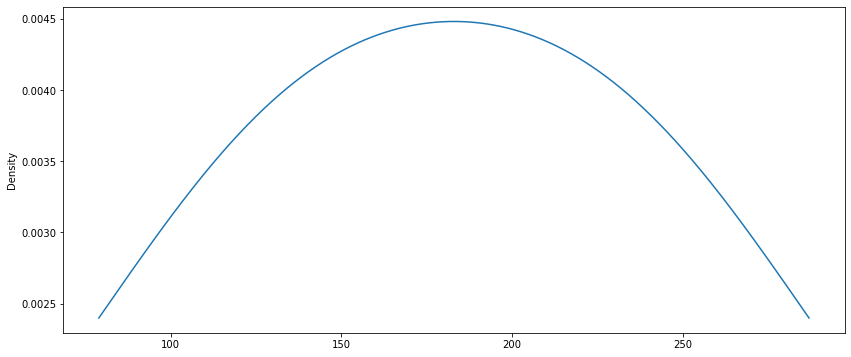

In [ ]:
snow_data.groupby('day_status')['ACC_DATE'].count().plot(kind='kde', figsize=(14,6))